<a href="https://colab.research.google.com/github/Sujoy-004/Indian-crop-yield-prediction/blob/main/crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Load Dataset and Perform Initial Exploration

In this step, we will load the Crop Yield dataset and perform some basic inspection tasks to understand its structure, data types, and initial quality. This helps us plan for cleaning and feature engineering in the next steps.

In [9]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Sujoy-004/Indian-crop-yield-prediction/refs/heads/main/crop_yield.csv";
df = pd.read_csv(url)

# Display the first few rows of the dataset
print("First 5 details of the dataset is shown below :\n")
display(df.head())

print("\n About the dataset:\n")
print(df.info(),'\n')

print("\ Column details:\n")
print(df.columns,'\n')

print("\n Shape of the dataset:\n")
print(df.shape  ,'\n')

First 5 details of the dataset is shown below :



,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909



 About the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None 

\ Column details:

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object') 


 Shape of the dataset:

(19689, 10) 



### Step 2: Data Cleaning and Preprocessing

This step involves identifying and handling missing or invalid values, converting data types, and dropping irrelevant or duplicate columns. This ensures our dataset is clean and ready for feature engineering.


In [18]:
# Check for missing values
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [19]:
# Drop rows with missing values (or optionally handle them with imputation if needed)
df_clean = df.dropna().reset_index(drop=True)

# Display shape after cleaning
print("Shape after removing missing values:", df_clean.shape)


Shape after removing missing values: (19689, 10)


In [20]:
# Check data types
df_clean.dtypes

,0
Crop,object
Crop_Year,int64
Season,object
State,object
Area,float64
Production,int64
Annual_Rainfall,float64
Fertilizer,float64
Pesticide,float64
Yield,float64


In [21]:
# Preview cleaned dataset
df_clean.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


The dataset has no missing values and all columns are structurally valid. It includes features like crop name, year, season, area, rainfall, and agrochemical usage — which are all potentially useful for predicting yield.


### Step 3: Feature Engineering

This step involves transforming categorical variables like Crop, Season, and State into numerical form using one-hot encoding. We'll also decide which features to include for model training.


In [15]:
# One-hot encode 'Crop', 'Season', and 'State'
df_encoded = pd.get_dummies(df_clean, columns=['Crop', 'Season', 'State'], drop_first=True)

# Display new shape
print("Shape after encoding:", df_encoded.shape)

Shape after encoding: (19689, 95)


In [16]:
# Features (excluding Yield which is our target)
X = df_encoded.drop('Yield', axis=1)

# Target
y = df_encoded['Yield']

In [17]:
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (19689, 94)
Target vector shape: (19689,)


### Step 4: Model Building – Train-Test Split and Linear Regression

We’ll now split the data into training and testing sets, then train a basic Linear Regression model to predict crop yield. We'll evaluate performance using common regression metrics.


In [22]:
from sklearn.model_selection import train_test_split

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (15751, 94)
Testing data shape: (3938, 94)


In [23]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 158461.93
Mean Absolute Error: 62.98
R² Score: 0.8022


The Linear Regression model provides a baseline performance for predicting crop yield. We'll explore advanced models next to improve accuracy.

### Step 5: Model Training and Evaluation Using 15 Regression Algorithms
In this step, we will train and evaluate 15 different regression models on our crop yield dataset. The goal is to identify which models perform best at predicting crop yield based on features like crop type, season, state, area, rainfall, fertilizer usage, and pesticide application.

For each model, we will compute the following metrics:

R² Score: Measures how well the predictions approximate the real data (closer to 1 is better).

Mean Absolute Error (MAE): The average absolute difference between predicted and actual values.

Mean Squared Error (MSE): The average squared difference between predicted and actual values.

This comparison will help us shortlist the top-performing models for further tuning and analysis in the next steps.

### Model 1: Linear Regression

Linear Regression is a fundamental and interpretable regression algorithm that assumes a linear relationship between features and target. It serves as a good baseline model to compare against more complex algorithms.


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Evaluate
r2_linear = r2_score(y_test, lr_preds)
mse_linear = mean_squared_error(y_test, lr_preds)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test, lr_preds)

print("Linear Regression Results:")
print(f"R2 Score: {r2_linear:.4f}")
print(f"MSE: {mse_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")

Linear Regression Results:
R2 Score: 0.8022
MSE: 158461.9276
RMSE: 398.0728
MAE: 62.9800


### Model 2: Ridge Regression

In this step, we'll implement Ridge Regression, a linear model that introduces L2 regularization to reduce model complexity and prevent overfitting by penalizing large coefficients.

In [51]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train Ridge Regression model with StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = pipeline.predict(X_test)

# Evaluation metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"R2 Score: {r2_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"MAE: {mae_ridge:.4f}")

Ridge Regression:
R2 Score: 0.8022
MSE: 158451.7946
RMSE: 398.0600
MAE: 62.9748


### Model 3: Lasso Regression

Now we implement Lasso Regression, which applies L1 regularization. This technique not only helps prevent overfitting but also performs feature selection by shrinking some coefficients to exactly zero — making the model more interpretable in high-dimensional datasets.

In [52]:
# Import Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize and train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)


print("Lasso Regression:")
print(f"R² Score: {r2_lasso:.4f}")
print(f"MSE: {mse_lasso:.4f}")
print(f"RMSE: {rmse_lasso:.4f}")
print(f"MAE: {mae_lasso:.4f}")

Lasso Regression:
R² Score: 0.8020
MSE: 158682.2085
RMSE: 398.3494
MAE: 59.5109


### Model 4: ElasticNet Regression

ElasticNet combines both L1 and L2 regularization to reduce overfitting and improve model generalization. It’s especially useful when dealing with datasets with multicollinearity or when feature selection is important.

We'll now fit an ElasticNet model to predict crop yield and evaluate its performance.


In [36]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize and fit ElasticNet model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elasticnet_model.fit(X_train, y_train)

# Predict
y_pred_en = elasticnet_model.predict(X_test)

# Evaluate
r2_en = r2_score(y_test, y_pred_en)
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
mae_en = mean_absolute_error(y_test, y_pred_en)

# Print metrics
print("ElasticNet Regression:")
print(f"R² Score: {r2_en:.4f}")
print(f"RMSE: {rmse_en:.4f}")
print(f"MAE: {mae_en:.4f}")


ElasticNet Regression:
R² Score: 0.4071
RMSE: 689.2209
MAE: 99.2492


### Model 5: Decision Tree Regressor

The Decision Tree Regressor splits the data into regions based on feature values to predict continuous targets. It's a non-linear model that can capture complex patterns but may overfit without pruning.

In this step, we'll train a Decision Tree on the crop yield dataset and evaluate its performance using R², RMSE, and MAE.


In [37]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and fit Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Print metrics
print("Decision Tree Regressor:")
print(f"R² Score: {r2_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"MAE: {mae_dt:.4f}")

Decision Tree Regressor:
R² Score: 0.9476
RMSE: 204.9785
MAE: 11.1498


### Model 6: Random Forest Regressor

Random Forest Regressor is an ensemble learning method that builds multiple decision trees and averages their outputs for better accuracy and generalization. It reduces overfitting and usually performs better than a single decision tree.

We'll now train a Random Forest on the crop yield data and evaluate it using R², RMSE, and MAE.


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print metrics
print("Random Forest Regressor:")
print(f"R² Score: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")

Random Forest Regressor:
R² Score: 0.9876
RMSE: 99.6090
MAE: 7.2608


### Model 7: Gradient Boosting Regressor

Gradient Boosting Regressor builds trees sequentially, where each new tree corrects the errors of the previous one. It is powerful for handling complex datasets and tends to achieve high accuracy through model boosting.

Now we apply Gradient Boosting to predict crop yield and evaluate its performance.


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

# Print metrics
print("Gradient Boosting Regressor:")
print(f"R² Score: {r2_gbr:.4f}")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"MAE: {mae_gbr:.4f}")

Gradient Boosting Regressor:
R² Score: 0.9843
RMSE: 112.1206
MAE: 10.0392


### Model 8: AdaBoost Regressor

AdaBoost (Adaptive Boosting) combines multiple weak learners (usually decision trees) in a sequential manner. Each model corrects the mistakes of its predecessor, focusing on harder cases. This approach often improves accuracy and reduces overfitting.

We now apply AdaBoost to predict crop yield and evaluate its performance.


In [40]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train AdaBoost model
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
ada_model.fit(X_train, y_train)

# Predict
y_pred_ada = ada_model.predict(X_test)

# Evaluate
r2_ada = r2_score(y_test, y_pred_ada)
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
mae_ada = mean_absolute_error(y_test, y_pred_ada)

# Print metrics
print("AdaBoost Regressor:")
print(f"R² Score: {r2_ada:.4f}")
print(f"RMSE: {rmse_ada:.4f}")
print(f"MAE: {mae_ada:.4f}")

AdaBoost Regressor:
R² Score: 0.9161
RMSE: 259.2824
MAE: 23.9267


### Model 9: XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting. It offers regularization, handling of missing values, and parallel processing. Ideal for structured/tabular data like crop yield prediction.

We now implement and evaluate XGBoost Regressor.


In [41]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Print results
print("XGBoost Regressor:")
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")

XGBoost Regressor:
R² Score: 0.9313
RMSE: 234.5326
MAE: 14.5459


### Model 10: LightGBM Regressor

LightGBM (Light Gradient Boosting Machine) is a highly efficient and fast gradient boosting framework developed by Microsoft. It uses histogram-based algorithms, making it much faster and more memory-efficient than traditional gradient boosting methods. Perfect for large structured datasets like crop yield data.

Let's now implement and evaluate LightGBM Regressor.


In [ ]:
from lightgbm import LGBMRegressor

# Initialize and train the model
lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate
r2_lgbm = r2_score(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

# Print results
print("LightGBM Regressor:")
print(f"R² Score: {r2_lgbm:.4f}")
print(f"RMSE: {rmse_lgbm:.4f}")
print(f"MAE: {mae_lgbm:.4f}")

### Model 11: K-Nearest Neighbors Regressor

KNN Regressor predicts the target value based on the average of the `k` nearest training examples in the feature space. It’s a simple, non-parametric method suitable for small to medium-sized datasets, but it can struggle with high dimensional data or large datasets due to performance and sensitivity to irrelevant features.

Let’s implement KNN Regressor below.


In [42]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
r2_knn = r2_score(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Print results
print("K-Nearest Neighbors Regressor:")
print(f"R² Score: {r2_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"MAE: {mae_knn:.4f}")


K-Nearest Neighbors Regressor:
R² Score: 0.8645
RMSE: 329.5329
MAE: 18.6625


### Model 12: Support Vector Regressor (SVR)

Support Vector Regressor (SVR) is based on the principles of Support Vector Machines. It tries to fit the best line (or hyperplane) within a threshold value (epsilon) such that most of the predicted points lie within this margin. SVR is effective for high-dimensional regression problems and when you need robustness against outliers.

We’ll use the RBF kernel here, which is common for non-linear problems.


In [43]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# SVR is sensitive to feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_svr = scaler_X.fit_transform(X_train)
X_test_svr = scaler_X.transform(X_test)
y_train_svr = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize and train
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_svr, y_train_svr)

# Predict and inverse transform
y_pred_svr_scaled = svr_model.predict(X_test_svr)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))

# Evaluate
r2_svr = r2_score(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# Print results
print("Support Vector Regressor:")
print(f"R² Score: {r2_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")

Support Vector Regressor:
R² Score: 0.9756
RMSE: 139.9050
MAE: 87.7630


### Model 13: Extra Trees Regressor

The Extra Trees Regressor (Extremely Randomized Trees) is an ensemble learning method that builds multiple unpruned decision trees using the entire dataset and averages their predictions. Unlike Random Forest, Extra Trees adds randomness by selecting cut-points randomly for each split. It typically results in faster training and can reduce overfitting.


In [44]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize and train
etr_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
etr_model.fit(X_train, y_train)

# Predict
y_pred_etr = etr_model.predict(X_test)

# Evaluate
r2_etr = r2_score(y_test, y_pred_etr)
rmse_etr = np.sqrt(mean_squared_error(y_test, y_pred_etr))
mae_etr = mean_absolute_error(y_test, y_pred_etr)

# Print results
print("Extra Trees Regressor:")
print(f"R² Score: {r2_etr:.4f}")
print(f"RMSE: {rmse_etr:.4f}")
print(f"MAE: {mae_etr:.4f}")

Extra Trees Regressor:
R² Score: 0.9812
RMSE: 122.8361
MAE: 7.4013


### Model 14: Bagging Regressor

The Bagging Regressor is an ensemble method that fits base regressors on random subsets of the dataset and then aggregates their predictions (usually by averaging). It helps in reducing variance and improving model stability, especially for high-variance models like decision trees.


In [46]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor  # Common base estimator

# Initialize and train
bag_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bag_model.fit(X_train, y_train)

# Predict
y_pred_bag = bag_model.predict(X_test)

# Evaluate
r2_bag = r2_score(y_test, y_pred_bag)
rmse_bag = np.sqrt(mean_squared_error(y_test, y_pred_bag))
mae_bag = mean_absolute_error(y_test, y_pred_bag)

# Print results
print("Bagging Regressor:")
print(f"R² Score: {r2_bag:.4f}")
print(f"RMSE: {rmse_bag:.4f}")
print(f"MAE: {mae_bag:.4f}")

Bagging Regressor:
R² Score: 0.9874
RMSE: 100.5773
MAE: 7.3349


## 📊 Model Performance Comparison

After training and evaluating 14 different regression models on the crop yield prediction dataset, we now compare their performance using the following metrics:

- **R² Score** (Coefficient of Determination): Indicates how well the model explains the variance in the target variable.
- **Root Mean Squared Error (RMSE)**: Measures the average magnitude of prediction error. Lower is better.
- **Mean Absolute Error (MAE)**: Measures the average absolute difference between predicted and actual values. Lower is better.

The table below summarizes the performance of all models to help identify the best-performing regressor for this task.

In [64]:
# List of models and their performance metrics
models = [
    'Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression',
    'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost',
    'XGBoost', 'LightGBM', 'KNN Regressor', 'SVR', 'Extra Trees', 'Bagging Regressor'
]

r2_scores = [
    r2_linear, r2_ridge, r2_lasso, r2_en,
    r2_dt, r2_rf, r2_gbr, r2_ada,
    r2_xgb, r2_lgbm, r2_knn, r2_svr, r2_etr, r2_bag
]

rmse_scores = [
    rmse_linear, rmse_ridge, rmse_lasso, rmse_en,
    rmse_dt, rmse_rf, rmse_gbr, rmse_ada,
    rmse_xgb, rmse_lgbm, rmse_knn, rmse_svr, rmse_etr, rmse_bag
]

mae_scores = [
    mae_linear, mae_ridge, mae_lasso, mae_en,
    mae_dt, mae_rf, mae_gbr, mae_ada,
    mae_xgb, mae_lgbm, mae_knn, mae_svr, mae_etr, mae_bag
]

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': models,
    'R² Score': r2_scores,
    'RMSE': rmse_scores,
    'MAE': mae_scores
})

# Sort by highest R² Score
comparison_df = comparison_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)

# Display the comparison table
comparison_df


,Model,R² Score,RMSE,MAE
0,Random Forest,0.987617,99.608997,7.260830
1,Bagging Regressor,0.987375,100.577272,7.334905
2,Gradient Boosting,0.984311,112.120645,10.039235
3,Extra Trees,0.981168,122.836105,7.401298
4,SVR,0.975571,139.905023,87.762954
5,Decision Tree,0.947561,204.978528,11.149846
6,LightGBM,0.942378,214.869995,16.319509
7,XGBoost,0.931349,234.532617,14.545899
8,AdaBoost,0.916096,259.282384,23.926654
9,KNN Regressor,0.864470,329.532875,18.662530


from matplotlib import pyplot as plt
comparison_df['R² Score'].plot(kind='hist', bins=20, title='R² Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='R² Score', y='RMSE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['R² Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('R² Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['RMSE']
  ys = series['MAE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('MAE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['RMSE']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'RMSE'}, axis=1)
              .sort_values('RMSE', ascending=True))
  xs = counted['RMSE']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df.sort_values('RMSE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('RMSE')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
comparison_df['R² Score'].plot(kind='line', figsize=(8, 4), title='R² Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

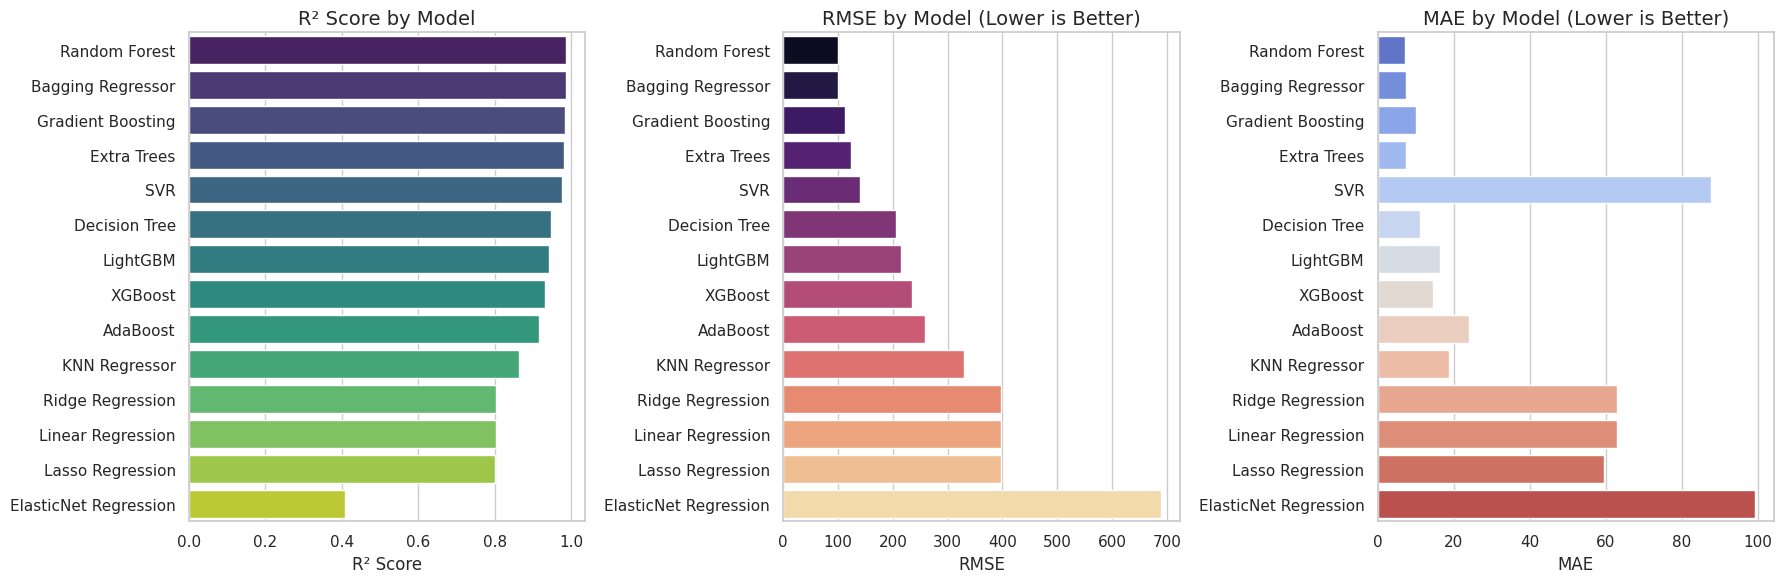

In [66]:
# 📊 Visualization of Model Performance Comparison

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

# Plot R² Score
plt.subplot(1, 3, 1)
sns.barplot(x="R² Score", y="Model", data=comparison_df, palette="viridis", hue="Model", legend=False)
plt.title("R² Score by Model", fontsize=14)
plt.xlabel("R² Score")
plt.ylabel("")

# Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(x="RMSE", y="Model", data=comparison_df, palette="magma", hue="Model", legend=False)
plt.title("RMSE by Model (Lower is Better)", fontsize=14)
plt.xlabel("RMSE")
plt.ylabel("")

# Plot MAE
plt.subplot(1, 3, 3)
sns.barplot(x="MAE", y="Model", data=comparison_df, palette="coolwarm", hue="Model", legend=False)
plt.title("MAE by Model (Lower is Better)", fontsize=14)
plt.xlabel("MAE")
plt.ylabel("")

plt.tight_layout()
plt.show()